# Thai National Job Survey apply with Machine Learning

# Importing Libraries

In [1]:
# Importing Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os
import itertools

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

# Check library version
print("---Library version---", end = '\n\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---

pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning
List Directory: ['.git', '.gitignore', '.ipynb_checkpoints', 'Analysis-New.ipynb', 'Data', 'EC477_ML.ipynb', 'fonts', 'Fundamental Data Manipulate', 'LICENSE', 'Machine Learning Model', 'Python For Machine Learning (Book)', 'README.md', 'Template']


# Loading Data

In [5]:
data = pd.read_csv(filepath_or_buffer = r'C:\Users\theer\Desktop\Machine Learning\Data\Complete-Data.csv', index_col= 'ลำดับ')
data.head()

,จังหวัดที่สำรวจ,ภูมิลำเนา,จังหวัด,เพศ,อายุ,ระดับการศึกษา,การประกอบอาชีพ,ท่านมีอาชีพรองหรือไม่,อาชีพที่มีรายได้มากอันดับที่ 2,ท่านทำงานในฐานะอะไร,รายได้รวมเฉลี่ยของท่านในปัจจุบัน,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่,ท่านมีภาวะหนี้สินหรือไม่,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,รายได้ที่ได้รับจากการทำงาน,งานที่ท่านทำอยู่ได้รับค่าตอบแทนในประเภท,ทำงานหนักเกินไป,สภาพความเป็นอยู่,งานของท่านมีปัญหา ทะเลาะขัดแย้งบ้างหรือไม่,ในเวลางานท่านเคยประสบเหตุการณ์ไม่ปลอดภัยต่อชีวิตและทรัพย์สินบ้างหรือไม่,ไม่ได้รับค่าตอบแทนตามที่ตกลงไว้,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่สามารถหยุดงานได้,ไม่มีสวัสดิการ,อาชีพในปัจจุบัน ท่านทำมานานเท่าใด,ก่อนหน้าที่ท่านทำงานในปัจจุบันท่านเคยทำงาน/ประกอบอาชีพหรือไม่,ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่,ท่านเคยโดนดูถูก / ไม่ได้รับการยอมรับจากการทำงานหรือไม่,อะไรคือความสำเร็จในชีวิตการทำงานในอนาคตของท่าน,อาชีพ
ลำดับ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19404,พัทลุง,พัทลุง,พัทลุง,หญิง,40,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,มี,มี,แรงงานรับจ้างทั่วไป,ลูกจ้าง,9000,4,ไม่เพียงพอ,มี,นอกระบบ,9000.0,รายชั่วโมง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,NaN,ไม่ใช่,ไม่ใช่,ใช่,ไม่ใช่,ไม่ใช่,NaN,เคย,ไม่อยาก,NaN,NaN,อาชีพนวด
34948,สงขลา,สงขลา,สงขลา,หญิง,59,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,NaN,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,3000,2,ไม่เพียงพอ,มี,ในระบบ,3000.0,รายวัน,กำไรน้อย/รายได้น้อย,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ใช่,10.0,เคย,อยาก,ไม่เคย,รายได้เพิ่มขึ้น,อาชีพนวด
67177,พระนครศรีอยุธยา,พระนครศรีอยุธยา,พระนครศรีอยุธยา,หญิง,67,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,NaN,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,8000,2,เพียงพอ,ไม่มี,นอกระบบ,3000.0,รายงวด/รายครั้ง,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,6.0,ไม่เคยทำงานมาก่อน,ไม่อยาก,ไม่เคย,ไม่ได้ตั้งเป้าหมาย,อาชีพนวด
80672,นครนายก,นครนายก,นครนายก,หญิง,57,มัธยมศึกษาตอนต้นหรือเทียบเท่า,มี,ไม่มี,NaN,การรวมกลุ่ม,5300,5,เพียงพอ,ไม่มี,นอกระบบ,5000.0,รายเดือน,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,NaN,ไม่เคยทำงานมาก่อน,อยาก,ไม่เคย,รายได้เพิ่มขึ้น,อาชีพนวด
80679,นครนายก,นครนายก,นครนายก,หญิง,54,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,มี,ไม่มี,NaN,การรวมกลุ่ม,6300,6,เพียงพอ,ไม่มี,นอกระบบ,6000.0,รายเดือน,NaN,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,NaN,ไม่เคยทำงานมาก่อน,อยาก,NaN,รายได้เพิ่มขึ้น,อาชีพนวด


In [6]:
print(f'Record: {data.shape[0]}, Variable: {data.shape[1]}')

Record: 122, Variable: 32


In [10]:
data.drop(columns=['อาชีพที่มีรายได้มากอันดับที่ 2', 'ทำงานหนักเกินไป', 'รายได้ที่ได้รับจากการทำงาน', 'อาชีพในปัจจุบัน ท่านทำมานานเท่าใด', 'ท่านเคยโดนดูถูก / ไม่ได้รับการยอมรับจากการทำงานหรือไม่'], inplace=True)

In [13]:
data.dropna(inplace=True)

In [15]:
data.head()

,จังหวัดที่สำรวจ,ภูมิลำเนา,จังหวัด,เพศ,อายุ,ระดับการศึกษา,การประกอบอาชีพ,ท่านมีอาชีพรองหรือไม่,ท่านทำงานในฐานะอะไร,รายได้รวมเฉลี่ยของท่านในปัจจุบัน,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่,ท่านมีภาวะหนี้สินหรือไม่,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,งานที่ท่านทำอยู่ได้รับค่าตอบแทนในประเภท,สภาพความเป็นอยู่,งานของท่านมีปัญหา ทะเลาะขัดแย้งบ้างหรือไม่,ในเวลางานท่านเคยประสบเหตุการณ์ไม่ปลอดภัยต่อชีวิตและทรัพย์สินบ้างหรือไม่,ไม่ได้รับค่าตอบแทนตามที่ตกลงไว้,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่สามารถหยุดงานได้,ไม่มีสวัสดิการ,ก่อนหน้าที่ท่านทำงานในปัจจุบันท่านเคยทำงาน/ประกอบอาชีพหรือไม่,ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่,อะไรคือความสำเร็จในชีวิตการทำงานในอนาคตของท่าน,อาชีพ
ลำดับ,,,,,,,,,,,,,,,,,,,,,,,,,,,
34948,สงขลา,สงขลา,สงขลา,หญิง,59,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,3000,2,ไม่เพียงพอ,มี,ในระบบ,รายวัน,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ใช่,เคย,อยาก,รายได้เพิ่มขึ้น,อาชีพนวด
67177,พระนครศรีอยุธยา,พระนครศรีอยุธยา,พระนครศรีอยุธยา,หญิง,67,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,8000,2,เพียงพอ,ไม่มี,นอกระบบ,รายงวด/รายครั้ง,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่เคยทำงานมาก่อน,ไม่อยาก,ไม่ได้ตั้งเป้าหมาย,อาชีพนวด
80672,นครนายก,นครนายก,นครนายก,หญิง,57,มัธยมศึกษาตอนต้นหรือเทียบเท่า,มี,ไม่มี,การรวมกลุ่ม,5300,5,เพียงพอ,ไม่มี,นอกระบบ,รายเดือน,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่เคยทำงานมาก่อน,อยาก,รายได้เพิ่มขึ้น,อาชีพนวด
80679,นครนายก,นครนายก,นครนายก,หญิง,54,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,มี,ไม่มี,การรวมกลุ่ม,6300,6,เพียงพอ,ไม่มี,นอกระบบ,รายเดือน,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่เคยทำงานมาก่อน,อยาก,รายได้เพิ่มขึ้น,อาชีพนวด
110744,ยโสธร,ยโสธร,ยโสธร,หญิง,51,ประถมศึกษาหรือต่ำกว่า,มี,ไม่มี,นายจ้าง,8000,2,ไม่เพียงพอ,มี,ในระบบ,รายงวด/รายครั้ง,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่มี,ไม่เคยประสบเหตุการณ์,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่ใช่,ใช่,เคย,ไม่อยาก,หมดภาระหนี้สิน,อาชีพนวด


In [16]:
print(f'Record: {data.shape[0]}, Variable: {data.shape[1]}')

Record: 105, Variable: 27


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 34948 to 560824
Data columns (total 27 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   จังหวัดที่สำรวจ                                                          105 non-null    object
 1   ภูมิลำเนา                                                                105 non-null    object
 2   จังหวัด                                                                  105 non-null    object
 3   เพศ                                                                      105 non-null    object
 4   อายุ                                                                     105 non-null    int64 
 5   ระดับการศึกษา                                                            105 non-null    object
 6   การประกอบอาชีพ                                                           105 non

In [21]:
data = data.iloc[:,[0,3,4,5,8,9,10,11,12,13,15,19,20,21,24]]
data.head()

,จังหวัดที่สำรวจ,เพศ,อายุ,ระดับการศึกษา,ท่านทำงานในฐานะอะไร,รายได้รวมเฉลี่ยของท่านในปัจจุบัน,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่,ท่านมีภาวะหนี้สินหรือไม่,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,สภาพความเป็นอยู่,ได้รับค่าตอบแทนล่าช้า,ชั่วโมงทำงานมากเกินไป,ไม่สามารถหยุดงานได้,ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่
ลำดับ,,,,,,,,,,,,,,,
34948,สงขลา,หญิง,59,ประถมศึกษาหรือต่ำกว่า,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,3000,2,ไม่เพียงพอ,มี,ในระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่ใช่,ไม่ใช่,ไม่ใช่,อยาก
67177,พระนครศรีอยุธยา,หญิง,67,ประถมศึกษาหรือต่ำกว่า,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,8000,2,เพียงพอ,ไม่มี,นอกระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่อยาก
80672,นครนายก,หญิง,57,มัธยมศึกษาตอนต้นหรือเทียบเท่า,การรวมกลุ่ม,5300,5,เพียงพอ,ไม่มี,นอกระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่ใช่,ไม่ใช่,ไม่ใช่,อยาก
80679,นครนายก,หญิง,54,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,การรวมกลุ่ม,6300,6,เพียงพอ,ไม่มี,นอกระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่ใช่,ไม่ใช่,ไม่ใช่,อยาก
110744,ยโสธร,หญิง,51,ประถมศึกษาหรือต่ำกว่า,นายจ้าง,8000,2,ไม่เพียงพอ,มี,ในระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่ใช่,ไม่ใช่,ไม่ใช่,ไม่อยาก


In [22]:
print(f'Record: {data.shape[0]}, Variable: {data.shape[1]}')

Record: 105, Variable: 15


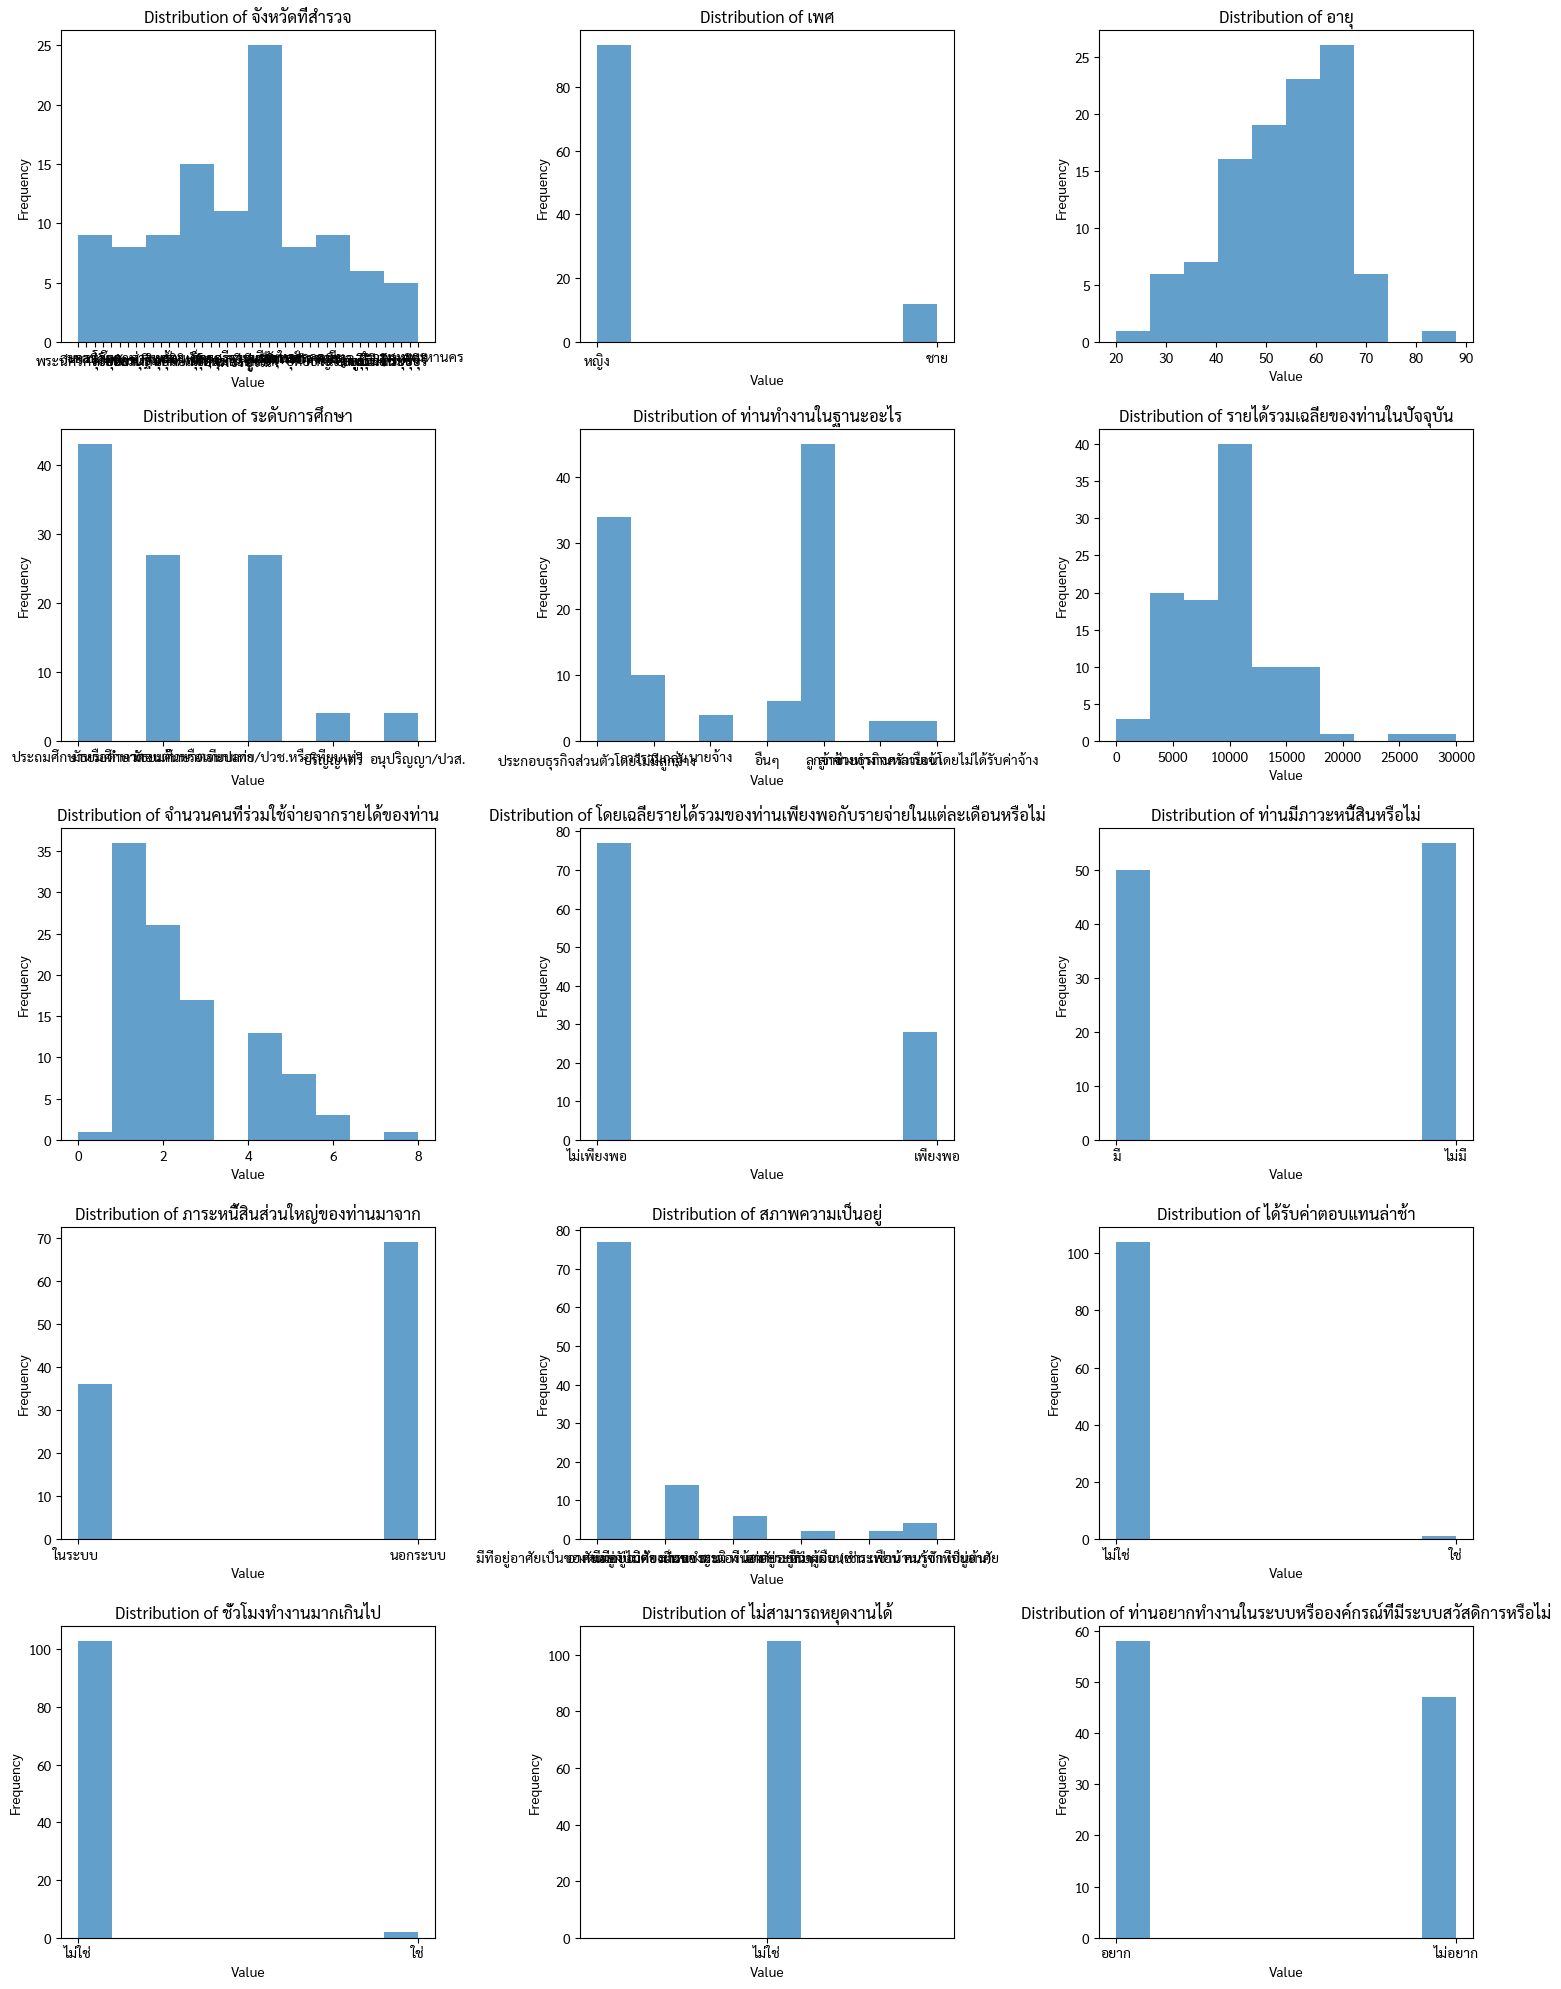

In [25]:
# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Plot distribution of each column
for i, column in enumerate(data.columns):
    ax = axes[i]
    ax.hist(data[column], bins=10, alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 34948 to 560824
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   จังหวัดที่สำรวจ                                                105 non-null    object
 1   เพศ                                                            105 non-null    object
 2   อายุ                                                           105 non-null    int64 
 3   ระดับการศึกษา                                                  105 non-null    object
 4   ท่านทำงานในฐานะอะไร                                            105 non-null    object
 5   รายได้รวมเฉลี่ยของท่านในปัจจุบัน                               105 non-null    int64 
 6   จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน                          105 non-null    int64 
 7   โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่  105 no

In [28]:
data = data.iloc[:,[0,2,3,4,5,6,7,8,9,10,14]]
data.head()

,จังหวัดที่สำรวจ,อายุ,ระดับการศึกษา,ท่านทำงานในฐานะอะไร,รายได้รวมเฉลี่ยของท่านในปัจจุบัน,จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน,โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่,ท่านมีภาวะหนี้สินหรือไม่,ภาระหนี้สินส่วนใหญ่ของท่านมาจาก,สภาพความเป็นอยู่,ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่
ลำดับ,,,,,,,,,,,
34948,สงขลา,59,ประถมศึกษาหรือต่ำกว่า,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,3000,2,ไม่เพียงพอ,มี,ในระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,อยาก
67177,พระนครศรีอยุธยา,67,ประถมศึกษาหรือต่ำกว่า,ประกอบธุรกิจส่วนตัวโดยไม่มีลูกจ้าง,8000,2,เพียงพอ,ไม่มี,นอกระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่อยาก
80672,นครนายก,57,มัธยมศึกษาตอนต้นหรือเทียบเท่า,การรวมกลุ่ม,5300,5,เพียงพอ,ไม่มี,นอกระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,อยาก
80679,นครนายก,54,มัธยมศึกษาตอนปลาย/ปวช.หรือเทียบเท่า,การรวมกลุ่ม,6300,6,เพียงพอ,ไม่มี,นอกระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,อยาก
110744,ยโสธร,51,ประถมศึกษาหรือต่ำกว่า,นายจ้าง,8000,2,ไม่เพียงพอ,มี,ในระบบ,มีที่อยู่อาศัยเป็นของตนเอง ไม่ต้องผ่อนชำระ,ไม่อยาก


In [29]:
print(f'Record: {data.shape[0]}, Variable: {data.shape[1]}')

Record: 105, Variable: 11


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 34948 to 560824
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   จังหวัดที่สำรวจ                                                105 non-null    object
 1   อายุ                                                           105 non-null    int64 
 2   ระดับการศึกษา                                                  105 non-null    object
 3   ท่านทำงานในฐานะอะไร                                            105 non-null    object
 4   รายได้รวมเฉลี่ยของท่านในปัจจุบัน                               105 non-null    int64 
 5   จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน                          105 non-null    int64 
 6   โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่  105 non-null    object
 7   ท่านมีภาวะหนี้สินหรือไม่                                       105 no

In [35]:
data['อายุ'].dtype

dtype('int64')

In [39]:
combinations = list(itertools.combinations(data.columns, 2))

In [58]:
combinations = [combo for combo in combinations if "โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่" in combo]
combinations

[('จังหวัดที่สำรวจ',
  'โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่'),
 ('อายุ', 'โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่'),
 ('ระดับการศึกษา',
  'โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่'),
 ('ท่านทำงานในฐานะอะไร',
  'โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่'),
 ('รายได้รวมเฉลี่ยของท่านในปัจจุบัน',
  'โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่'),
 ('จำนวนคนที่ร่วมใช้จ่ายจากรายได้ของท่าน',
  'โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่'),
 ('โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่',
  'ท่านมีภาวะหนี้สินหรือไม่'),
 ('โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่',
  'ภาระหนี้สินส่วนใหญ่ของท่านมาจาก'),
 ('โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่',
  'สภาพความเป็นอยู่'),
 ('โดยเฉลี่ยรายได้รวมของท่านเพียงพอกับรายจ่ายในแต่ละเดือนหรือไม่',
  'ท่านอยากทำงานในระบบหรือองค์กรณ์ที่มีระบบสวัสดิการหรือไม่')]

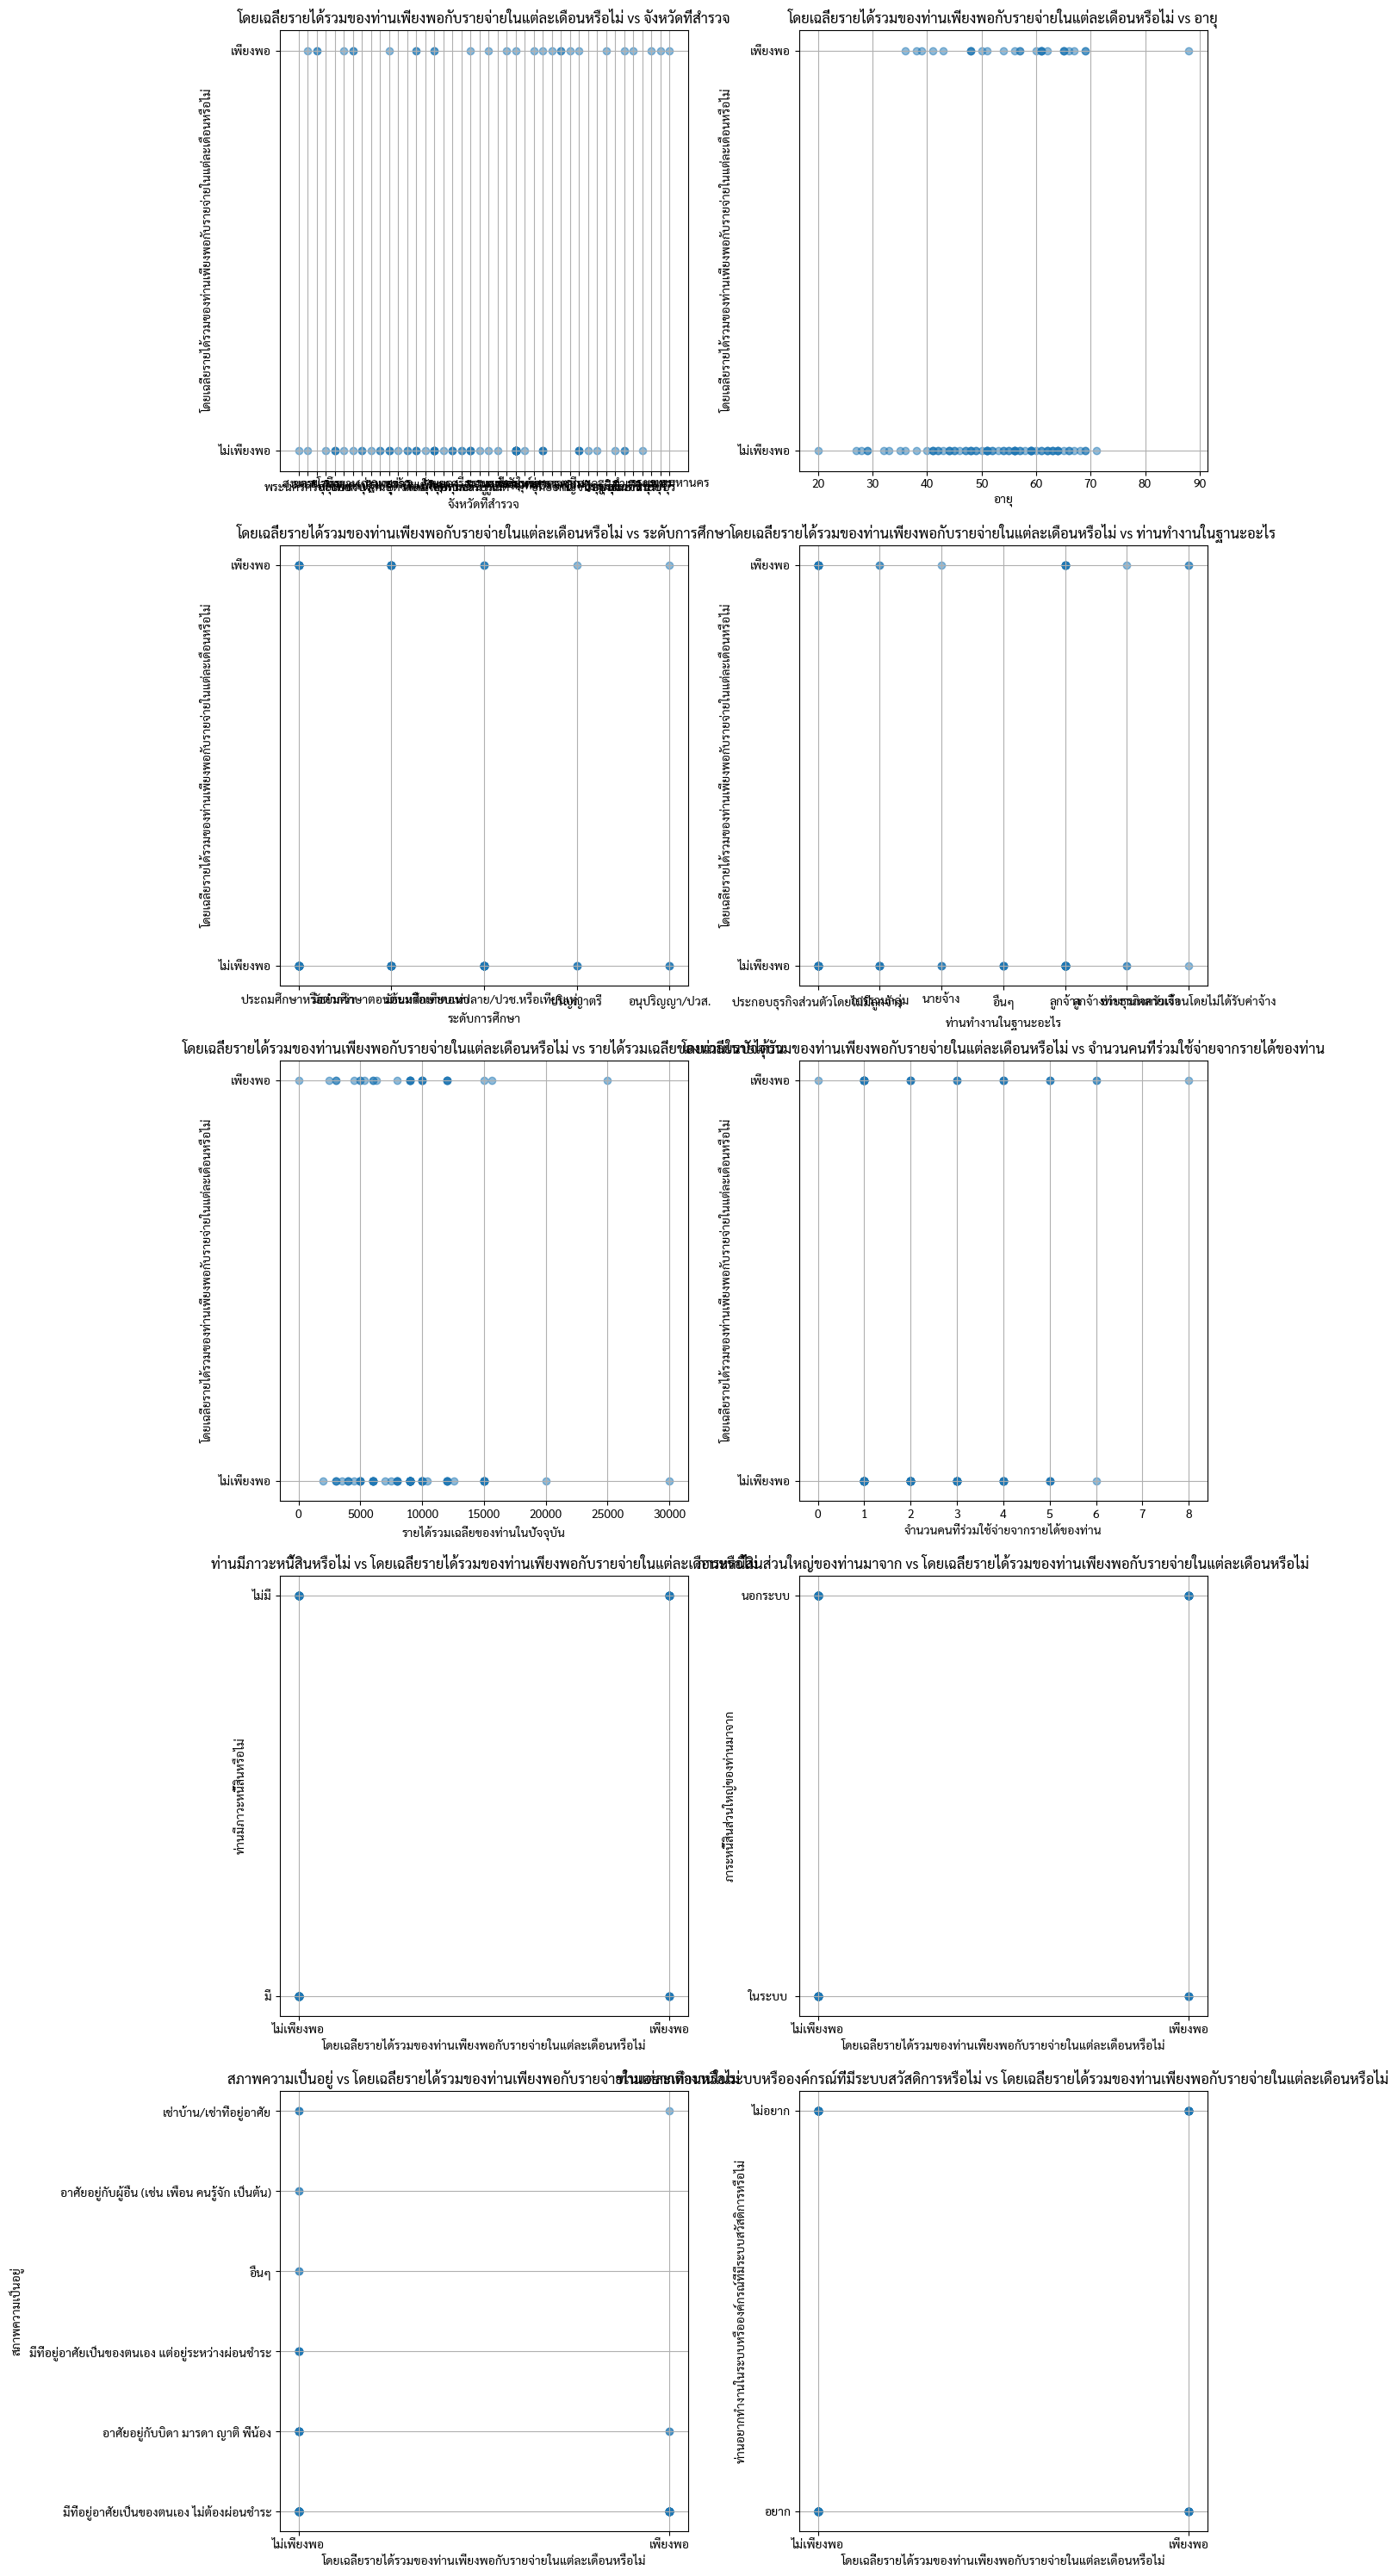

In [59]:
# Determine number of rows and columns for subplot layout
num_plots = len(combinations)
num_cols = 2  # Number of columns in subplot layout
num_rows = 5  # Ceiling division to ensure all plots are accommodated

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))
axes = axes.flatten()  # Flatten axes to handle both 1D and 2D cases

# Plot each combination
for i, combination in enumerate(combinations):
    x_column, y_column = combination
    ax = axes[i]  # Select current subplot
    ax.scatter(data[x_column], data[y_column], alpha=0.5)
    ax.set_title(f'{y_column} vs {x_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

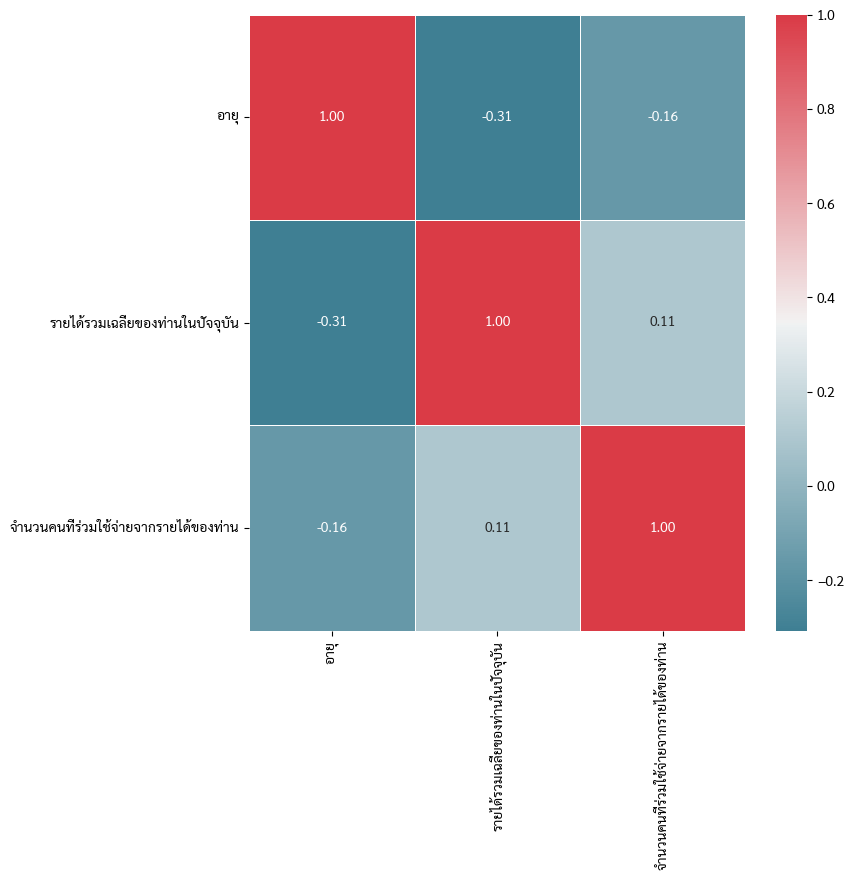

In [55]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation
corr = numeric_data.corr()


fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f")
plt.show()


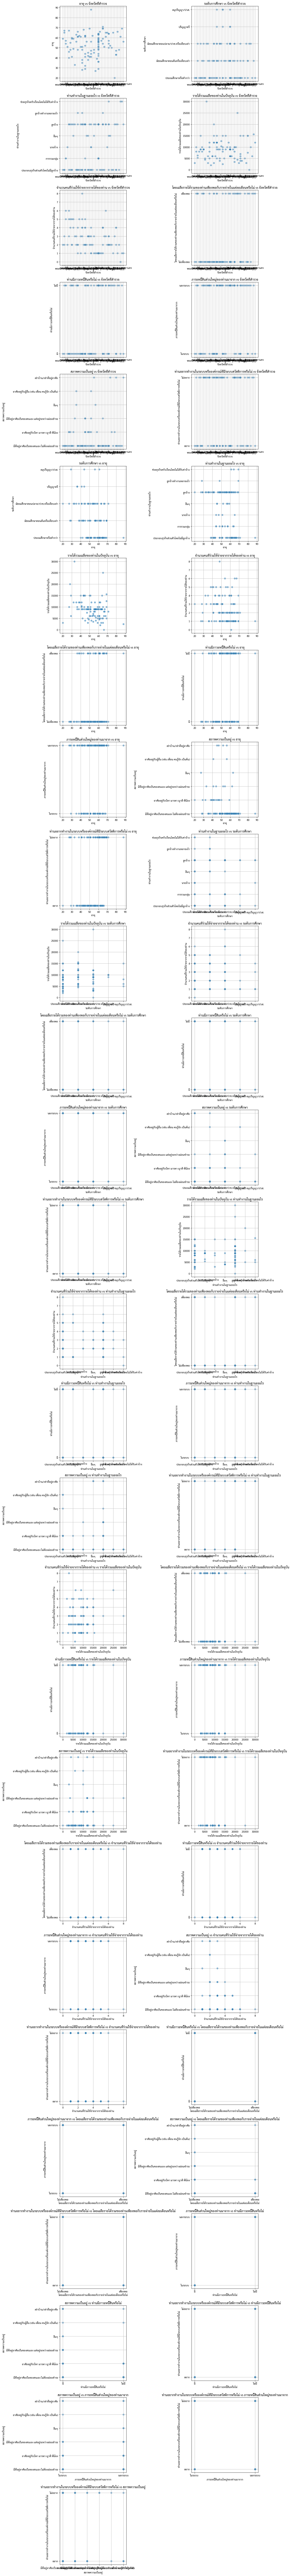

In [61]:
# Generate all possible combinations of scatter plots
combinations = list(itertools.combinations(data.columns, 2))

# Determine number of rows and columns for subplot layout
num_plots = len(combinations)
num_cols = 2  # Number of columns in subplot layout
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure all plots are accommodated

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()  # Flatten axes to handle both 1D and 2D cases

# Plot each combination
for i, combination in enumerate(combinations):
    x_column, y_column = combination
    ax = axes[i]  # Select current subplot
    ax.scatter(data[x_column], data[y_column], alpha=0.5)
    ax.set_title(f'{y_column} vs {x_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()